# AMATH 422 HW 2

In [1]:
#imports
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la

## QUESTION I (a)


In [2]:
#intial conditions
Ia_arr=np.array([3,0.5,0.9,0.95])
fa_arr=np.array([0,1,5,0.5])
initial_population = np.array([100, 100, 100, 100])  # initial population for each age
n_zero=np.array([100,100,100,100])
Tmax = 50
A_mat=np.array([[0,1,5,0.5],[0.5, 0, 0, 0],[0, 0.9, 0,0],[0, 0.0, 0.95,0]])

print(A_mat)
print(n_zero)


[[0.   1.   5.   0.5 ]
 [0.5  0.   0.   0.  ]
 [0.   0.9  0.   0.  ]
 [0.   0.   0.95 0.  ]]
[100 100 100 100]


In [3]:
Tmax=50
n_vs_t=np.zeros([4,Tmax])
n_vs_t[:,0]=n_zero 

#Print out our quanties so far
print(n_vs_t[:,0])
print(A_mat)
print(np.dot(A_mat,n_vs_t[:,0]))

[100. 100. 100. 100.]
[[0.   1.   5.   0.5 ]
 [0.5  0.   0.   0.  ]
 [0.   0.9  0.   0.  ]
 [0.   0.   0.95 0.  ]]
[650.  50.  90.  95.]


In [4]:
#Generation of Values
iter_arr=np.arange(Tmax-1)

for t in iter_arr:
    n_vs_t[:,t+1]=np.dot(A_mat,n_vs_t[:,t])

#calculate the log of n(t)
log_n_vs_t = np.log(n_vs_t)

# Calculate total population size N(t) at each time step
N_t = np.zeros(Tmax)
for t in range(Tmax):
    N_t[t] = np.sum(n_vs_t[:, t])

print(n_vs_t.shape)
print(log_n_vs_t.shape)
print(N_t.shape)
print(iter_arr.shape)

(4, 50)
(4, 50)
(50,)
(49,)


#Generate Graphs \
    Plot of each N(t) \
    Plot of each log N(t) \
    Plot of each fraction of N(t)

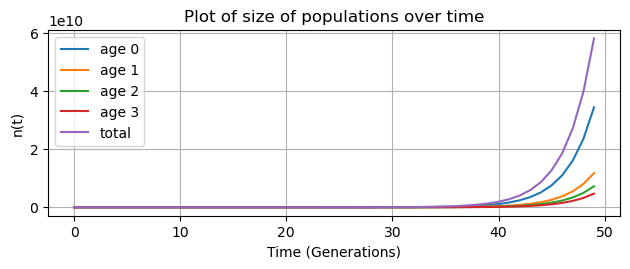

In [5]:
#Plot of each fraction of N(t)

generation_arr=np.arange(Tmax)
plt.subplot(2, 1, 2)
plt.plot(generation_arr,n_vs_t[0,:],label="age 0")
plt.plot(generation_arr,n_vs_t[1,:],label="age 1")
plt.plot(generation_arr,n_vs_t[2,:],label="age 2")
plt.plot(generation_arr,n_vs_t[3,:],label="age 3")
plt.plot(generation_arr,N_t,label="total")

plt.xlabel('Time (Generations)')
plt.ylabel('n(t)')
plt.title('Plot of size of populations over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


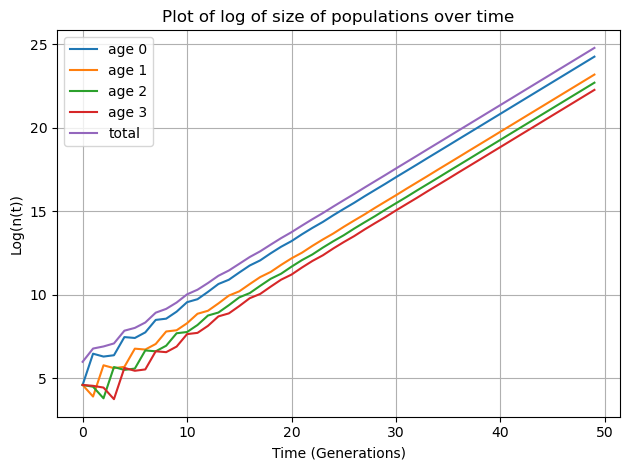

In [6]:
#plot of log(n) vs t
plt.plot(generation_arr,np.log(n_vs_t[0,:]),label="age 0")
plt.plot(generation_arr,np.log(n_vs_t[1,:]),label="age 1")
plt.plot(generation_arr,np.log(n_vs_t[2,:]),label="age 2")
plt.plot(generation_arr,np.log(n_vs_t[3,:]),label="age 3")
plt.plot(generation_arr,np.log(N_t),label="total")

plt.xlabel('Time (Generations)')
plt.ylabel('Log(n(t))')
plt.title('Plot of log of size of populations over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(4, 50)


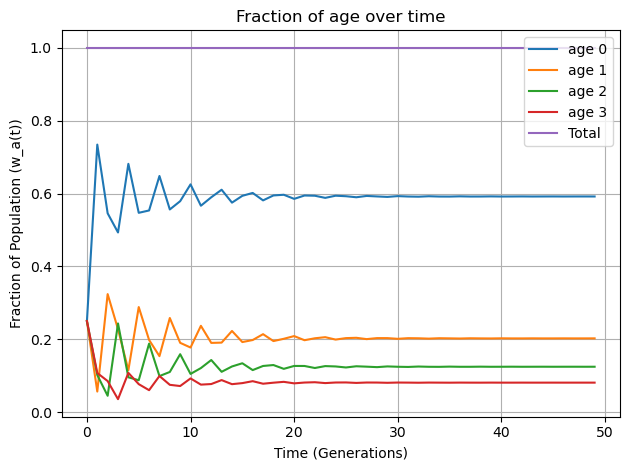

In [7]:
# Calculate the fraction of individuals in each age group w_a(t) = n_a(t) / N(t)
w_vs_t = np.zeros((4, Tmax))
for t in range(Tmax):
    w_vs_t[:, t] = n_vs_t[:, t] / N_t[t]
print(w_vs_t.shape) #should be a (4, 50 matrix)

plt.plot(np.arange(Tmax), w_vs_t[0, :], label='age 0')
plt.plot(np.arange(Tmax), w_vs_t[1, :], label='age 1')
plt.plot(np.arange(Tmax), w_vs_t[2, :], label='age 2')
plt.plot(np.arange(Tmax), w_vs_t[3, :], label='age 3')

w_t_sum = np.zeros(Tmax)
for t in range(Tmax):
    w_t_sum[t] = np.sum(w_vs_t[:, t])
plt.plot(np.arange(Tmax), w_t_sum, label='Total')

plt.xlabel('Time (Generations)')
plt.ylabel('Fraction of Population (w_a(t))')
plt.title('Fraction of age over time')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

Use the numpy polyfit function to fit a first order polynomial to the log
N(t) and report the growth rate lambda.

In [8]:
p=np.polyfit(x=generation_arr,y=np.log(N_t),deg=1)
lambda_estimate=np.exp(p[0])
print(p)
print(lambda_estimate)

[0.38019638 6.15837247]
1.4625717774380425


Lambda Estimate without the Squiggles

In [9]:
generation_arr_after_squiggles=np.arange(25,Tmax)

p=np.polyfit(generation_arr_after_squiggles,np.log(n_vs_t[0,generation_arr_after_squiggles]),1)
lambda_estimate=np.exp(p[0])

print(p)
print(lambda_estimate)

[0.38006369 5.63874003]
1.4623777242600995


## Question I (b) 
Write down the Euler-lotka formula for this example, and solve it numerically or the population
growth rate.

Define Function for the Euler-Lotka sum. $\sum\limits_{a=0}^n {\lambda ^{-(a+1)}I_a f_a -1}$ where $I_a$ and $f_a$ are two 1-D arrays and $\lambda$ is a scalar.

In [10]:
#Euler Lokta Formulation
#Write down the Euler-lotka formula for this example, and solve it numerically or the population
#growth rate lambda: How close are your predictions of lambda from the Euler-lotka formulas and from the
#simulations above? Turn in the code you used for this.
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

def eulot_func(lam,Ia_arr,fa_arr):
        """compute the Euler-Lotka sum, taking as arguments a scalar and two 1-D numpy arrays"""
        length_of_array=Ia_arr.size
        age_arr=np.arange(0,length_of_array)
        temp_arr=lam**(-(age_arr+1))*Ia_arr*fa_arr 
        return sum(temp_arr) -1 


Ia_arr=np.array([3,0.5,0.9,0.95])
fa_arr=np.array([0,1,5,0.5])

#Lambda estimate?

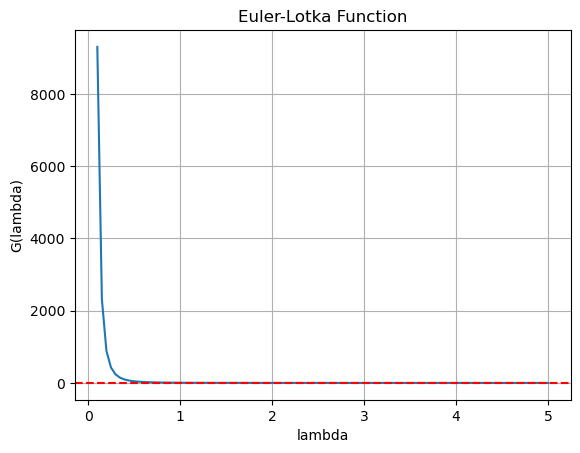

In [11]:
# Range of lambda values to plot over
lambda_min = 0.1
lambda_max = 5
lambda_arr = np.linspace(lambda_min, lambda_max, 100)

# Compute G(lambda) for each value in the range
G_arr = np.zeros(lambda_arr.size)
for j in range(lambda_arr.size):
    G_arr[j] = eulot_func(lambda_arr[j], Ia_arr, fa_arr)

# Plotting G(lambda)
plt.plot(lambda_arr, G_arr)
plt.axhline(0, color='r', linestyle='--')  # Line at G=0 for reference
plt.xlabel('lambda')
plt.ylabel('G(lambda)')
plt.title('Euler-Lotka Function')
plt.grid(True)
plt.show()


In [12]:
#Brent's method to find the root of the function between the given brackets
left_bracket = 0.5
right_bracket = 2
args = (Ia_arr, fa_arr)

#Solve for lambda using brentq
lambda_solution = opt.brentq(eulot_func, left_bracket, right_bracket, args=args)

print("Estimated population growth rate (lambda):", lambda_solution)

Estimated population growth rate (lambda): 1.7818660191092137


First Order Polynomial Estimate: 1.4623777242600995 \
Euler-Lokta Estimate: 1.7818660191092137

The difference between the estimates is because parts of the matrix population model has transient dynamics before the population reaches a stable age distribution, whereas the Euler-Lotka equation assumes a stable age distribution from the beginning.
By extending the simulation to a longer time period, the population should approach a stable age structure, and the estimate of λ from the simulation will converge to the value obtained from the Euler-Lotka equation.

## Question II (a) 
Population Growth Rate Depends on Overall Survival: The long-term population growth rate λ. λ depends on the overall survival to reproductive age and reproductive output (i.e., the number of offspring produced by individuals who reach breeding age). Since survival to age 3 is represented by I3, the precise distribution of survival across earlier ages does not change the total survival to age 3 as long as the product remains constant.

## Question II (b)

In [13]:
import numpy as np

# Define parameters
p0, p1, p2 = 0.3, 0.4, 0.6  # Example survival probabilities with p0 * p1 * p2 = 0.0722
pa = 0.942 # Adult survival probability for ages 3 to 49
fa = 0.240 # Fecundity rate for ages 3 and above
max_age = 50 # Max age Size of A.

# Construct the projection matrix A
A = np.zeros((max_age, max_age))

# Set fecundities in the first row for ages 3 and above
A[0, 3:] = fa

# Set survival probabilities in the subdiagonal
A[1, 0] = p0
A[2, 1] = p1
A[3, 2] = p2
A[4:, 3:-1] = np.eye(max_age - 4) * pa
print(A)
print(A.shape)

[[0.    0.    0.    ... 0.24  0.24  0.24 ]
 [0.3   0.    0.    ... 0.    0.    0.   ]
 [0.    0.4   0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.942 0.    0.   ]
 [0.    0.    0.    ... 0.    0.942 0.   ]]
(50, 50)


## Question II (c)

In [14]:
# Compute the dominant eigenvalue (long-term growth rate lambda)
eigenvalues = np.linalg.eigvals(A)
lambda_long_term = max(eigenvalues.real)

print(f"Long-term growth rate (lambda): {lambda_long_term:.4f}")

Long-term growth rate (lambda): 0.9431
